epoch 1: train acc 0.1300, test acc 0.1013
epoch 2: train acc 0.3600, test acc 0.2477
epoch 3: train acc 0.3500, test acc 0.2513
epoch 4: train acc 0.2700, test acc 0.2117
epoch 5: train acc 0.2700, test acc 0.2107
epoch 6: train acc 0.2700, test acc 0.2108
epoch 7: train acc 0.2600, test acc 0.2107
epoch 8: train acc 0.2700, test acc 0.2104
epoch 9: train acc 0.2700, test acc 0.2118
epoch 10: train acc 0.3000, test acc 0.2245
epoch 11: train acc 0.3800, test acc 0.2476
epoch 12: train acc 0.4400, test acc 0.2816
epoch 13: train acc 0.5200, test acc 0.3406
epoch 14: train acc 0.6000, test acc 0.3976
epoch 15: train acc 0.6500, test acc 0.4635
epoch 16: train acc 0.7000, test acc 0.4945
epoch 17: train acc 0.8100, test acc 0.5378
epoch 18: train acc 0.7400, test acc 0.5246
epoch 19: train acc 0.7900, test acc 0.5102
epoch 20: train acc 0.8900, test acc 0.5457
epoch 21: train acc 0.8800, test acc 0.5307
epoch 22: train acc 0.7800, test acc 0.5344
epoch 23: train acc 0.8100, test acc 0.54

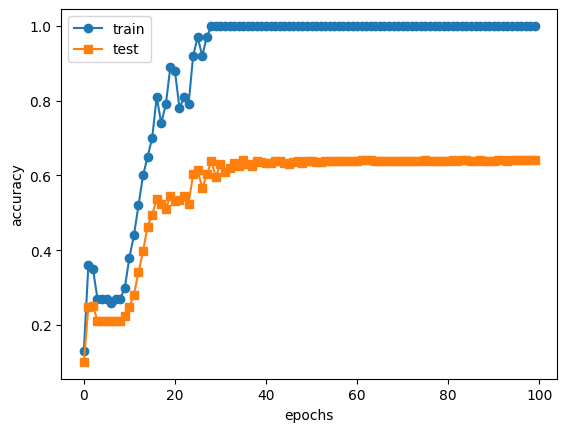

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# ----------------------------------------------------
# 1. 데이터 불러오기 (MNIST)
# ----------------------------------------------------
transform = transforms.ToTensor()
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, download=True, transform=transform)

# 학습 데이터에서 100개만 사용 → overfitting 유도
train_subset = torch.utils.data.Subset(train_dataset, range(100))
train_loader = torch.utils.data.DataLoader(train_subset, batch_size=20, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

# ----------------------------------------------------
# 2. 모델 정의 (큰 네트워크)
# ----------------------------------------------------
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 512),
    nn.ReLU(),
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 10)
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# ----------------------------------------------------
# 3. 손실 함수와 옵티마이저
# ----------------------------------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# ----------------------------------------------------
# 4. 학습 루프
# ----------------------------------------------------
train_acc_list, test_acc_list = [], []
epochs = 100

for epoch in range(epochs):
    model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # train accuracy
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    train_acc = correct / total

    # test accuracy
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_acc = correct / total

    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

    print(f"epoch {epoch+1}: train acc {train_acc:.4f}, test acc {test_acc:.4f}")

# ----------------------------------------------------
# 5. 결과 시각화
# ----------------------------------------------------
epochs = 100  # 실제 epoch 
plt.figure(figsize=(10, 6))

plt.plot(range(1, epochs+1), train_acc_list, label="train",
         marker="o", markersize=5, linewidth=2, color="royalblue")
plt.plot(range(1, epochs+1), test_acc_list, label="test",
         marker="s", markersize=5, linewidth=2, color="darkorange")

plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Train vs Test Accuracy", fontsize=16)
plt.xticks(range(0, epochs+1, 10))
plt.ylim(0, 1.05)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

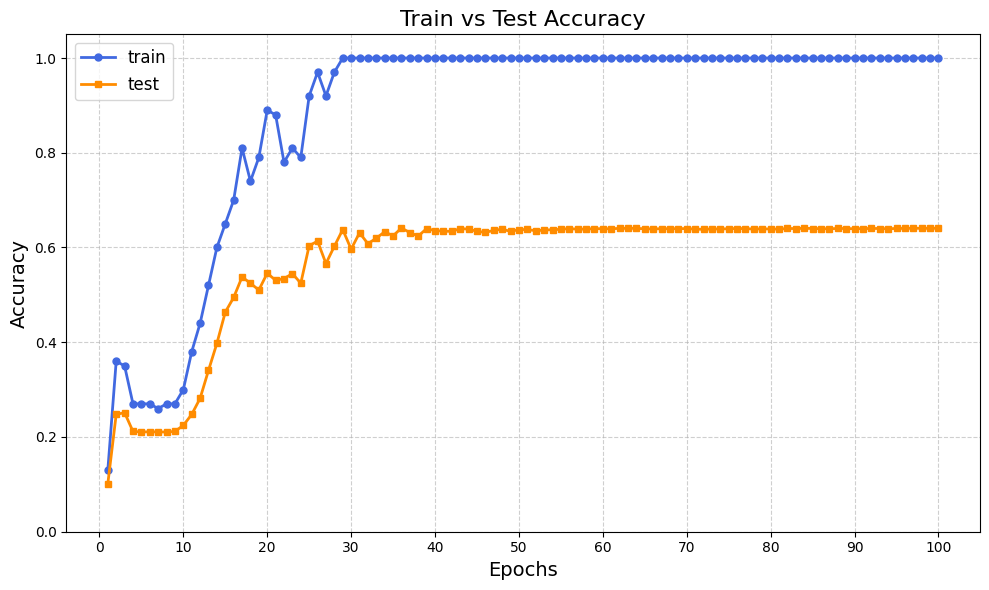

In [7]:
import matplotlib.pyplot as plt

epochs = 100  # 실제 epoch 수에 맞게 조정
plt.figure(figsize=(10, 6))

plt.plot(range(1, epochs+1), train_acc_list, label="train",
         marker="o", markersize=5, linewidth=2, color="royalblue")
plt.plot(range(1, epochs+1), test_acc_list, label="test",
         marker="s", markersize=5, linewidth=2, color="darkorange")

plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Train vs Test Accuracy", fontsize=16)
plt.xticks(range(0, epochs+1, 10))
plt.ylim(0, 1.05)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


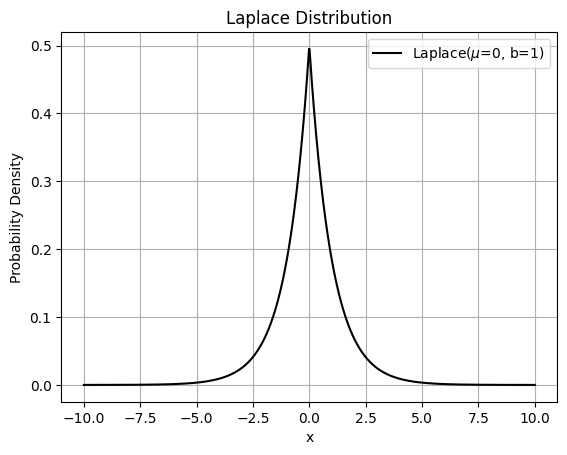

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import laplace

# 파라미터 설정: 위치(mu), 스케일(b)
mu = 0       # 평균 (중심)
b = 1        # 스케일 (분포의 폭)

# x 범위 설정
x = np.linspace(-10, 10, 1000)

# 라플라스 분포의 확률 밀도 함수 (PDF) 계산
pdf = laplace.pdf(x, loc=mu, scale=b)

# 그래프 그리기
plt.plot(x, pdf, label=f'Laplace($\\mu$={mu}, b={b})', color='black')
plt.title('Laplace Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()


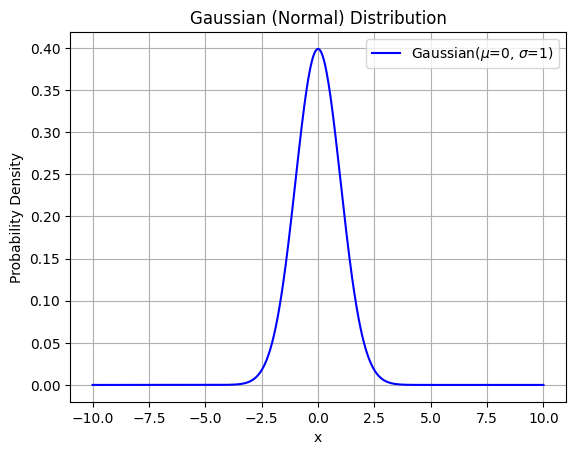

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 정규분포 파라미터
mu = 0      # 평균
sigma = 1   # 표준편차

# x 범위 설정
x = np.linspace(-10, 10, 1000)

# 정규분포 확률 밀도 함수 (PDF)
pdf_gaussian = norm.pdf(x, loc=mu, scale=sigma)

# 그래프 그리기
plt.plot(x, pdf_gaussian, label=f'Gaussian($\\mu$={mu}, $\\sigma$={sigma})', color='blue')
plt.title('Gaussian (Normal) Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()


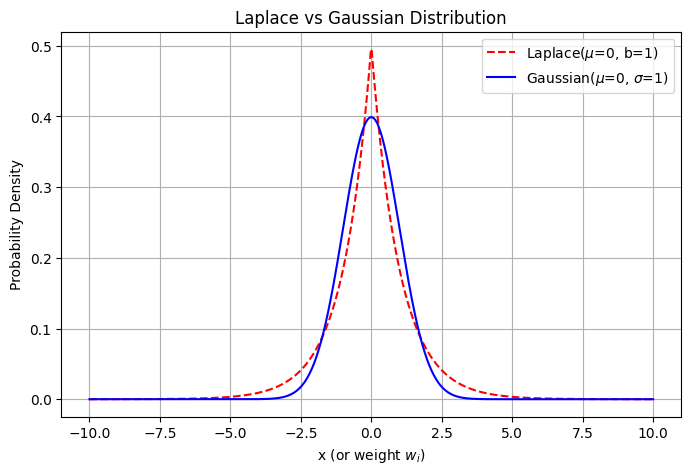

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import laplace, norm

# 공통 설정
x = np.linspace(-10, 10, 1000)

# 라플라스 분포 파라미터
mu_lap = 0
b = 1
pdf_laplace = laplace.pdf(x, loc=mu_lap, scale=b)

# 정규분포 파라미터
mu_gauss = 0
sigma = 1
pdf_gaussian = norm.pdf(x, loc=mu_gauss, scale=sigma)

# 그래프 그리기
plt.figure(figsize=(8, 5))
plt.plot(x, pdf_laplace, label='Laplace($\\mu$=0, b=1)', color='red', linestyle='--')
plt.plot(x, pdf_gaussian, label='Gaussian($\\mu$=0, $\\sigma$=1)', color='blue')
plt.title('Laplace vs Gaussian Distribution')
plt.xlabel('x (or weight $w_i$)')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()
